In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001290476"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001290476
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,Village Bank & Trust Financial Corp.
Ticker,VBFC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,48.0,1.332333e+01,7.807627e+00,6.700000e-01,8.215000e+00,1.026500e+01,1.807500e+01,2.698000e+01
interest income,48.0,5.316333e+06,1.824483e+06,1.870000e+06,3.968250e+06,5.020500e+06,6.816000e+06,8.719000e+06
net income,48.0,-9.536115e+04,2.447010e+06,-6.884000e+06,-6.432500e+02,2.590000e+05,4.262500e+05,1.193200e+07
net interest income,2.0,3.317509e+09,3.942714e+08,3.038717e+09,3.178113e+09,3.317509e+09,3.456905e+09,3.596301e+09
provision for loan losses,46.0,2.984674e+06,1.455637e+06,0.000000e+00,2.295000e+06,3.186500e+06,4.001500e+06,5.138000e+06


# Plots

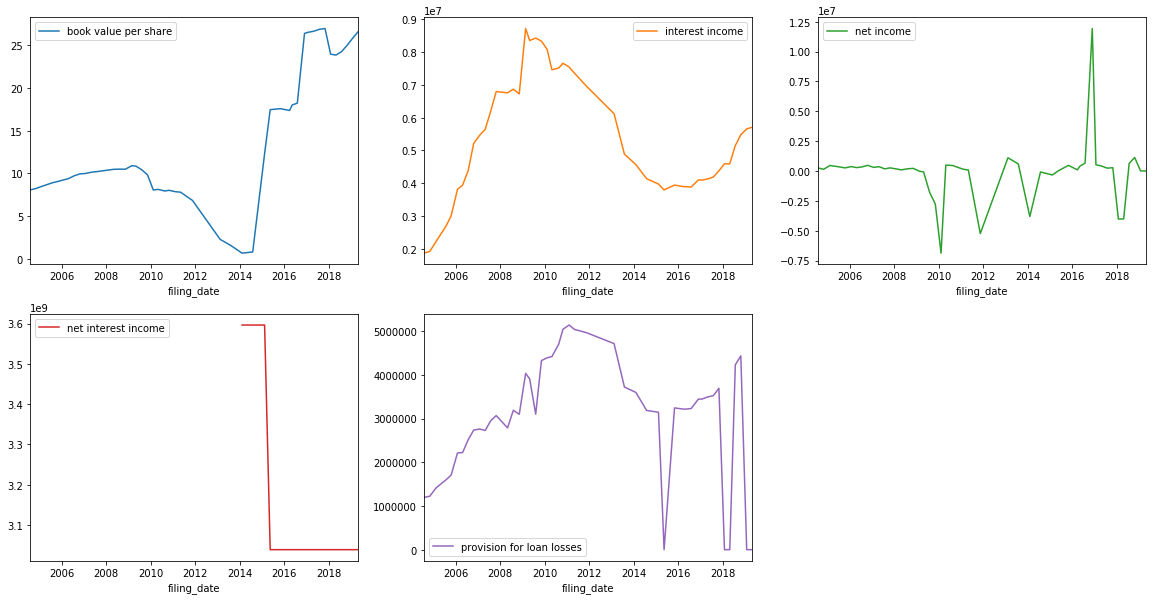

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001290476 book value per share                             2005Q1    missing   
           book value per share                             2007Q4    missing   
           book value per share                             2011Q2    missing   
           book value per share        2011Q4 to 2012Q3: 4 periods    missing   
           book value per share                             2013Q1    missing   
           book value per share                             2013Q3    missing   
           book value per share                             2014Q1    missing   
           book value per share                             2014Q3    missing   
           book value per share                             2015Q2    missing   
           interest income                                  2005Q1    missing   
           interest income                                  2007Q4    missing   
           interest income                                  2011Q2    missing   
           interest income             2011Q4 to 2012Q3: 4 periods    missing   
           interest income                                  2013Q1    missing   
           interest income                                  2013Q3    missing   
           interest income                                  2014Q1    missing   
           interest income                                  2014Q3    missing   
           interest income                                  2015Q2    missing   
           interest income                                  2018Q1    missing   
           net income                                       2005Q1    missing   
           net income                                       2007Q4    missing   
           net income                                       2011Q2    missing   
           net income                  2011Q4 to 2012Q3: 4 periods    missing   
           net income                                       2013Q1    missing   
           net income                                       2013Q3    missing   
           net income                                       2014Q1    missing   
           net income                                       2014Q3    missing   
           net income                                       2015Q2    missing   
           net income                                       2018Q1    missing   
           net income                                       2018Q4  duplicate   
           net interest income        2004Q2 to 2013Q3: 38 periods    missing   
           net interest income         2014Q1 to 2014Q4: 4 periods    missing   
           net interest income        2015Q2 to 2019Q1: 16 periods    missing   
           provision for loan losses                        2005Q1    missing   
           provision for loan losses                        2007Q4    missing   
           provision for loan losses                        2011Q2    missing   
           provision for loan losses   2011Q4 to 2012Q3: 4 periods    missing   
           provision for loan losses                        2013Q1    missing   
           provision for loan losses                        2013Q3    missing   
           provision for loan losses                        2014Q1    missing   
           provision for loan losses                        2014Q3    missing   
           provision for loan losses                        2015Q2    missing   
           provision for loan losses                        2016Q1    missing   
           provision for loan losses                        2016Q4    missing   
           provision for loan losses                        2018Q1    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001290476 book value per share           Missing per

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()